In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(linewidth=120)

In [26]:
SURVEY = 'LSST_DESI'

if (SURVEY=='SDSS'):
    import params as pa
elif (SURVEY=='LSST_DESI'):
    import params_LSST_DESI as pa
else:
    print "We don't have support for that survey yet; exiting."
    exit()

In [27]:
# Import sysz S/N as a function of cza and czb
StoNsys = np.loadtxt('./txtfiles/StoNsys_czaczb_'+SURVEY+'_deltaz='+str(pa.delta_z)+'_SNonly.txt')

# Import stat S/N
StoNstat = np.loadtxt('./txtfiles/StoNstat_Blazek_'+SURVEY+'_deltaz='+str(pa.delta_z)+'_SNonly.txt')


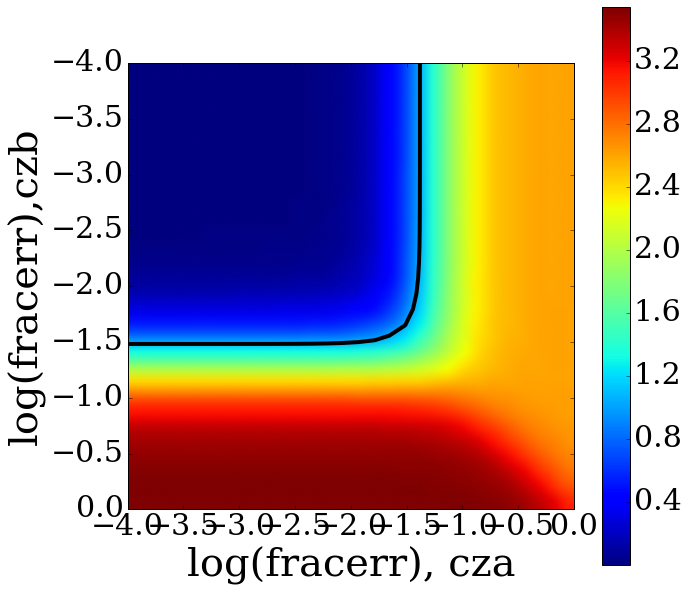

frac error czb= 0.0417531893656
frac error cza= 0.0417531893656


In [28]:
# Plot StoNstat / StoNsys

plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "serif"
plt.imshow(StoNstat / StoNsys, extent=[-4, 0, 0, -4], aspect=1, interpolation='spline36')
plt.hold(True)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize='30')
#plt.clim(0,3.0)
plt.contour(np.linspace(-4,0,30), np.linspace(-4,0,30), StoNstat / StoNsys, [1.0], colors='k', linewidths=4)
plt.xlabel('log(fracerr), cza', fontsize=40)
plt.ylabel('log(fracerr),czb', fontsize=40)
plt.tick_params(axis='both', labelsize='30')
#plt.title('(Stat S/N, shapes method) / (Stat S/N, Blazek method), SDSS', fontsize=20)
plt.show()
#plt.tight_layout()
plt.savefig('./plots/StoN_sysoverstat_czaczb_'+SURVEY+'.png')

ratio = StoNstat / StoNsys
rowind = next(j[0] for j in enumerate(ratio[:,0]) if j[1]>=1.)
colind =  next(j[0] for j in enumerate(ratio[0,:]) if j[1]>=1.)

print "frac error czb=", pa.fudge_frac_level[rowind]
print "frac error cza=", pa.fudge_frac_level[colind]